In [ ]:
%pip install pandas numpy matplotlib seaborn scikit-learn
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# PREPARING THE DATASETS

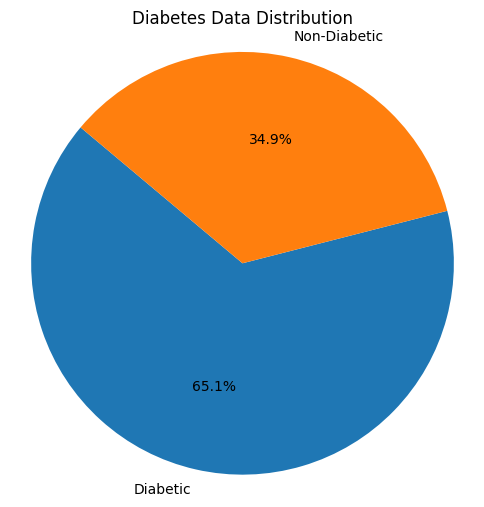

In [ ]:
data_file_path = 'pima-indians-diabetes.csv'
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetic_df = pd.read_csv(data_file_path, header=None, names=column_names)

# print(f"Dataset shape: {diabetic_df.shape}")

labels = ['Diabetic', 'Non-Diabetic']
y = diabetic_df['Outcome'].values
X = diabetic_df.drop(columns=['Outcome']).values

label_counts = np.bincount(y)

plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Diabetes Data Distribution')
plt.axis('equal') 
plt.show()

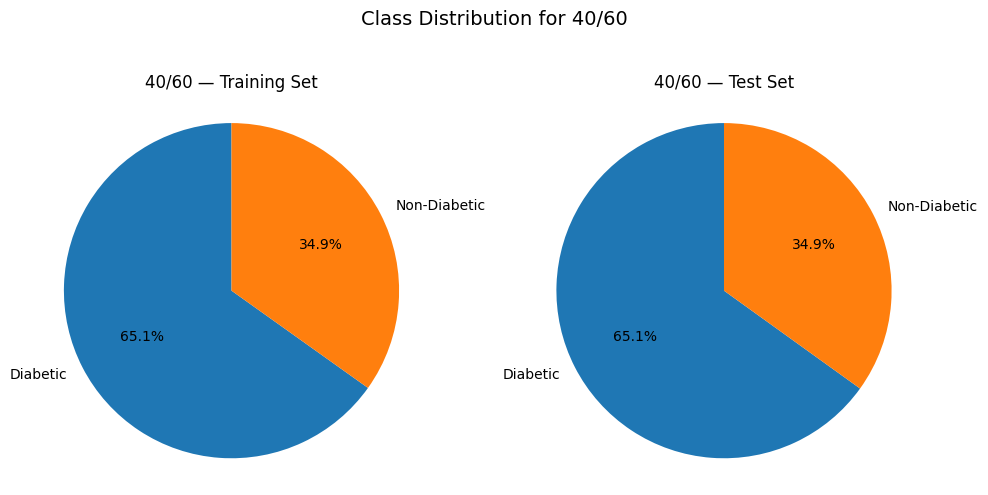

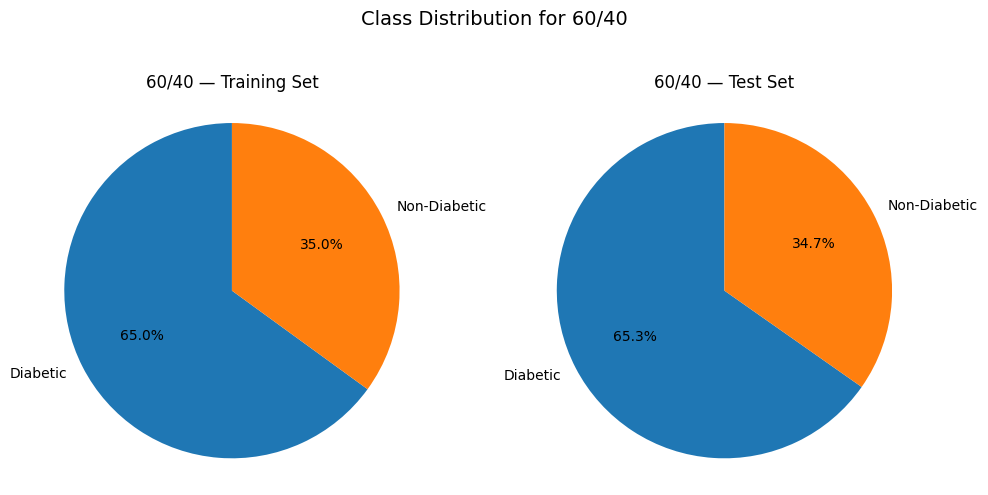

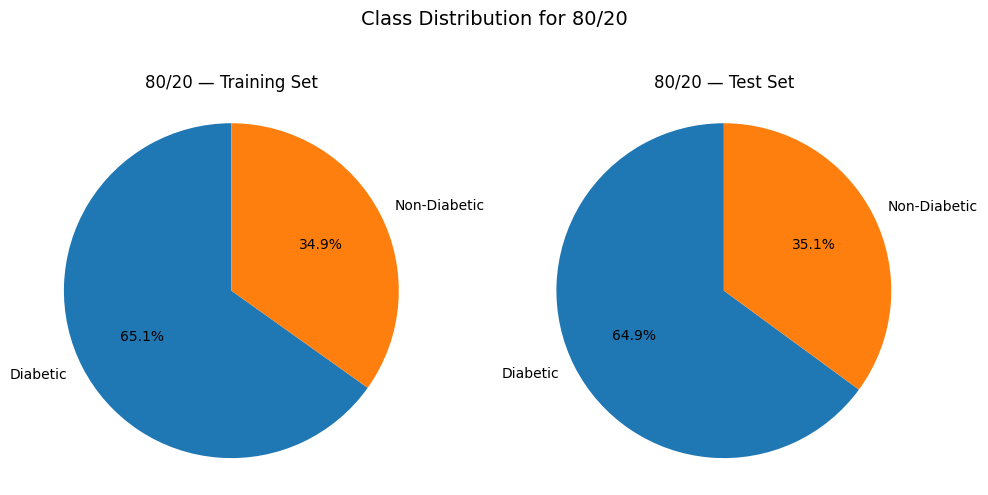

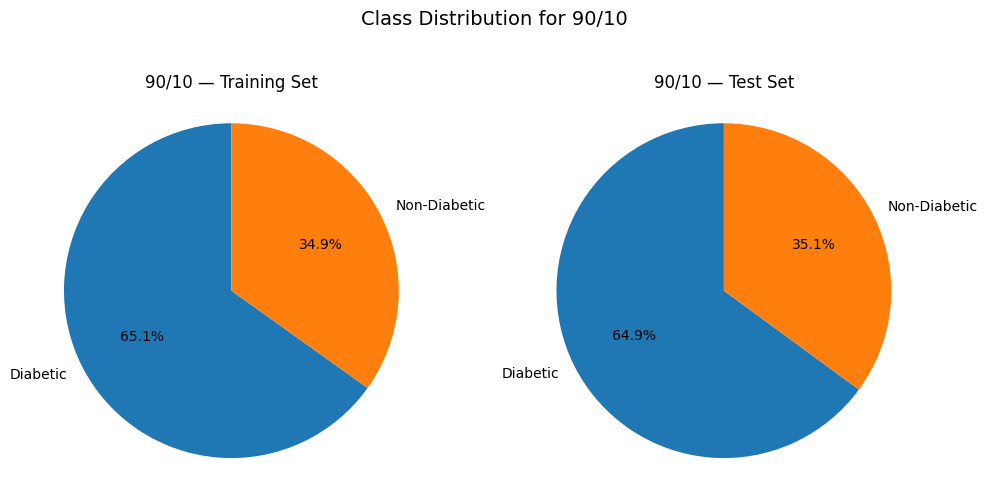

In [ ]:
ratios = {
    "40/60": (0.4, 0.6),
    "60/40": (0.6, 0.4),
    "80/20": (0.8, 0.2),
    "90/10": (0.9, 0.1),
}
splits = {}

for name, (train_size, test_size) in ratios.items():
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
        X, y,
        train_size=train_size,
        test_size=test_size,
        stratify=y,
        shuffle=True,
        random_state=42
    )
    splits[name] = {
        "X_train": X_train,
        "y_train": y_train,
        "X_test":  X_test,
        "y_test":  y_test
    }

# Each split: training & test pies
for name, subset in splits.items():
    ct_train = np.bincount(subset["y_train"])
    ct_test  = np.bincount(subset["y_test"])
    
    # create a 1×2 grid
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    axes[0].pie(
        ct_train,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90
    )
    axes[0].set_title(f"{name} — Training Set")
    axes[0].axis('equal')    
    
    axes[1].pie(
        ct_test,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90
    )
    axes[1].set_title(f"{name} — Test Set")
    axes[1].axis('equal')
    
    fig.suptitle(f"Class Distribution for {name}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# BUILDING THE DESICION TREE CLASSIFIERS

Decision Tree for 40/60 Split


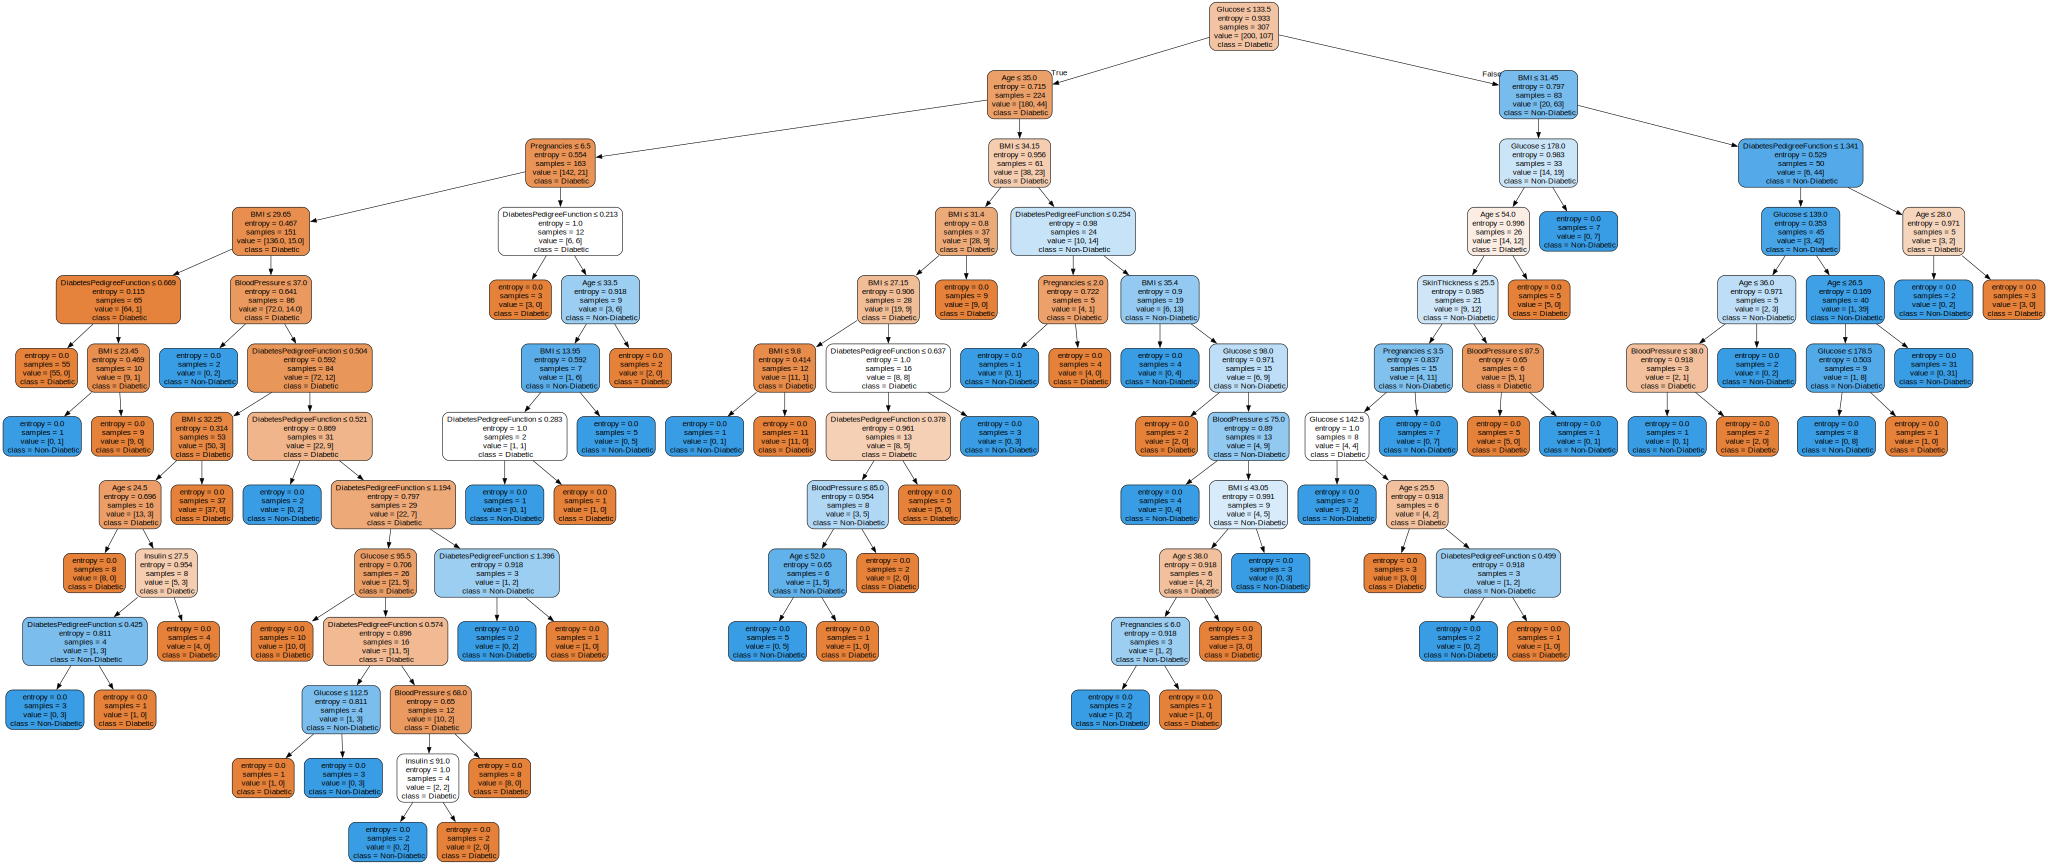

Decision Tree for 60/40 Split


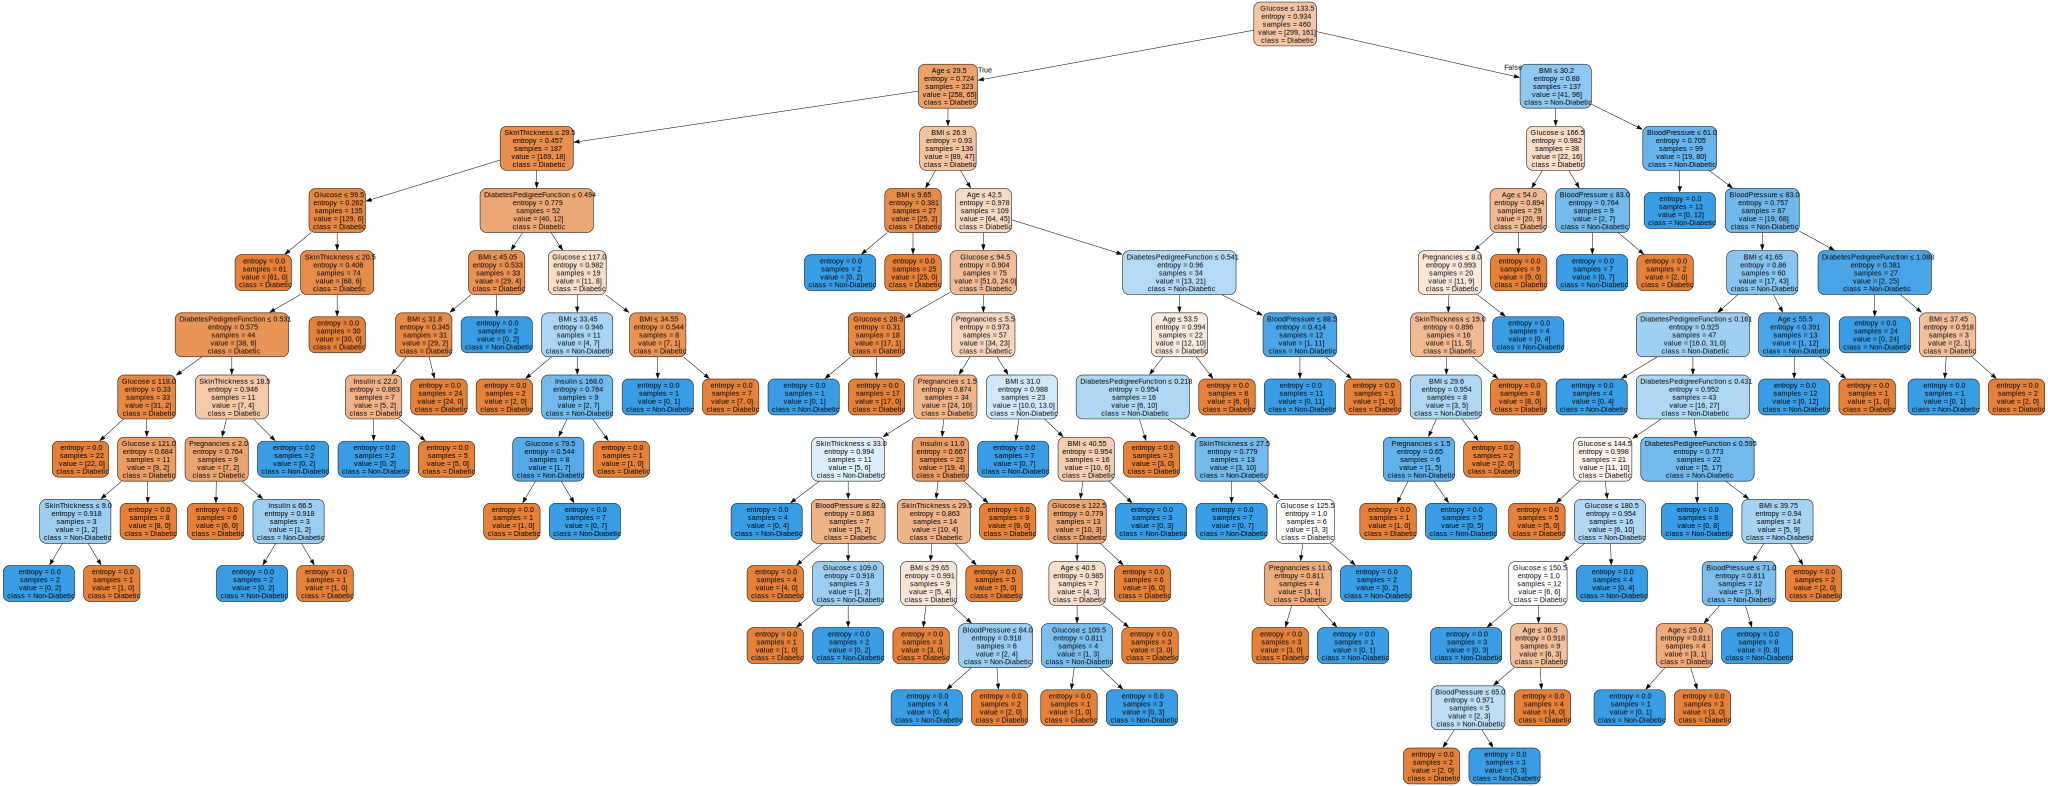

Decision Tree for 80/20 Split


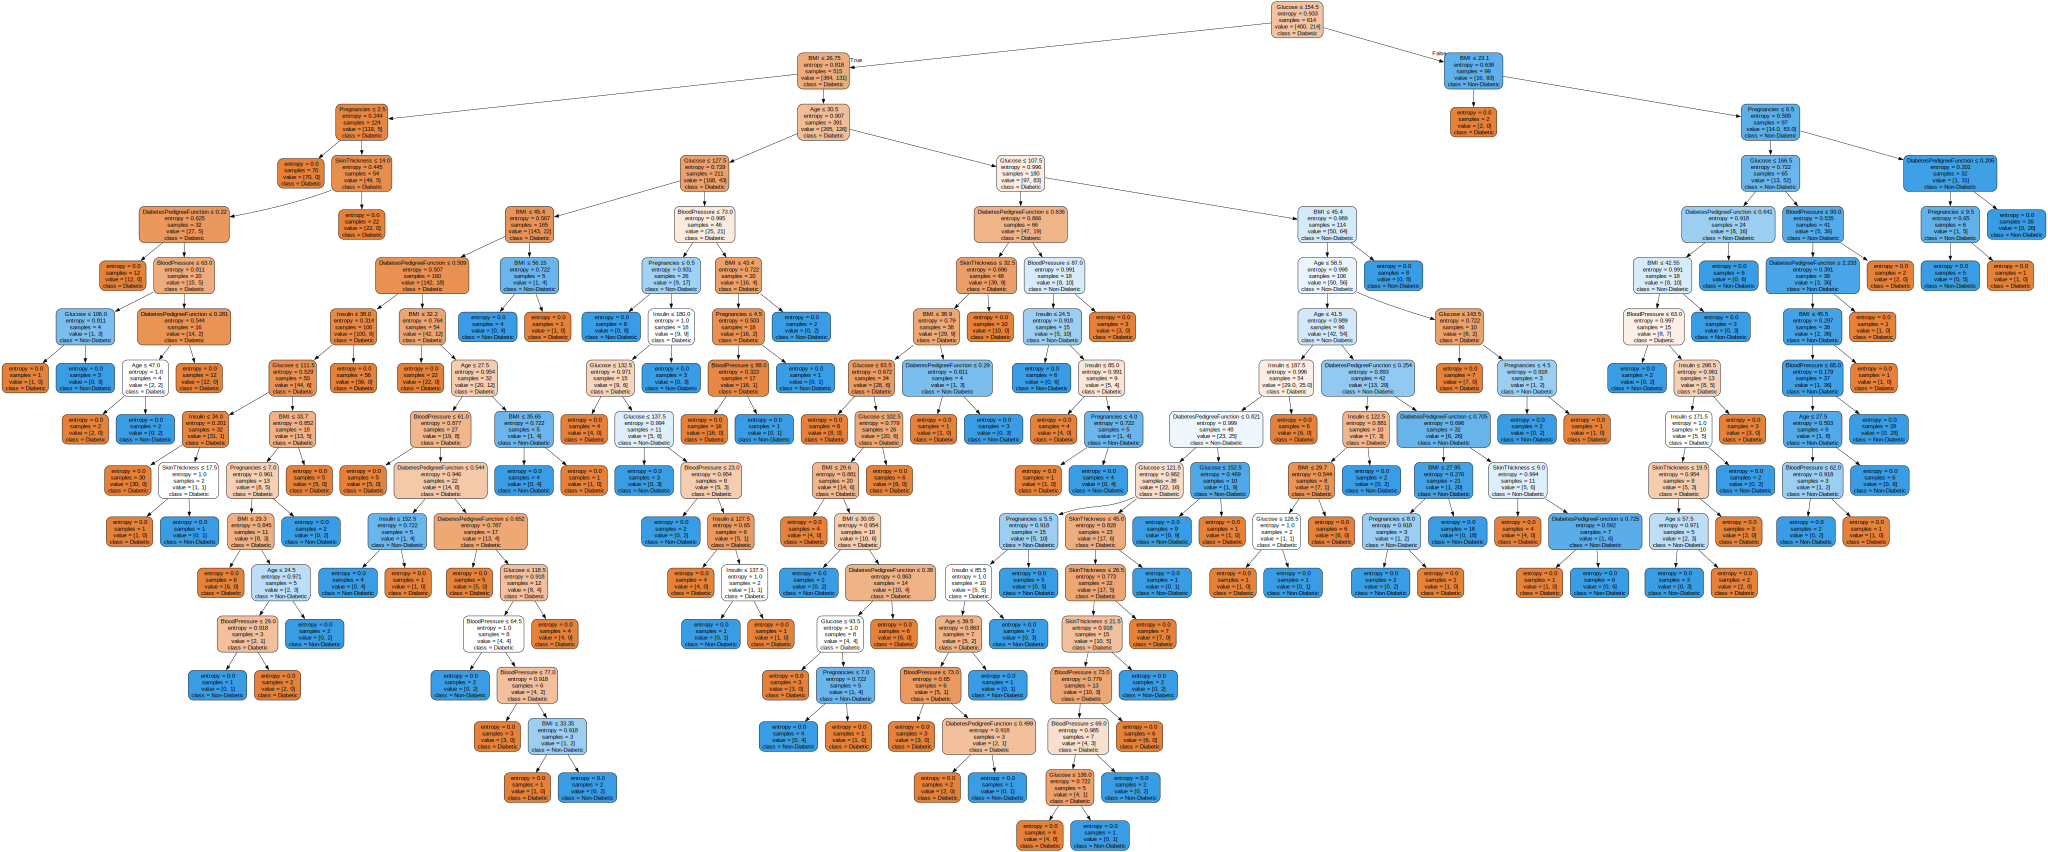

Decision Tree for 90/10 Split


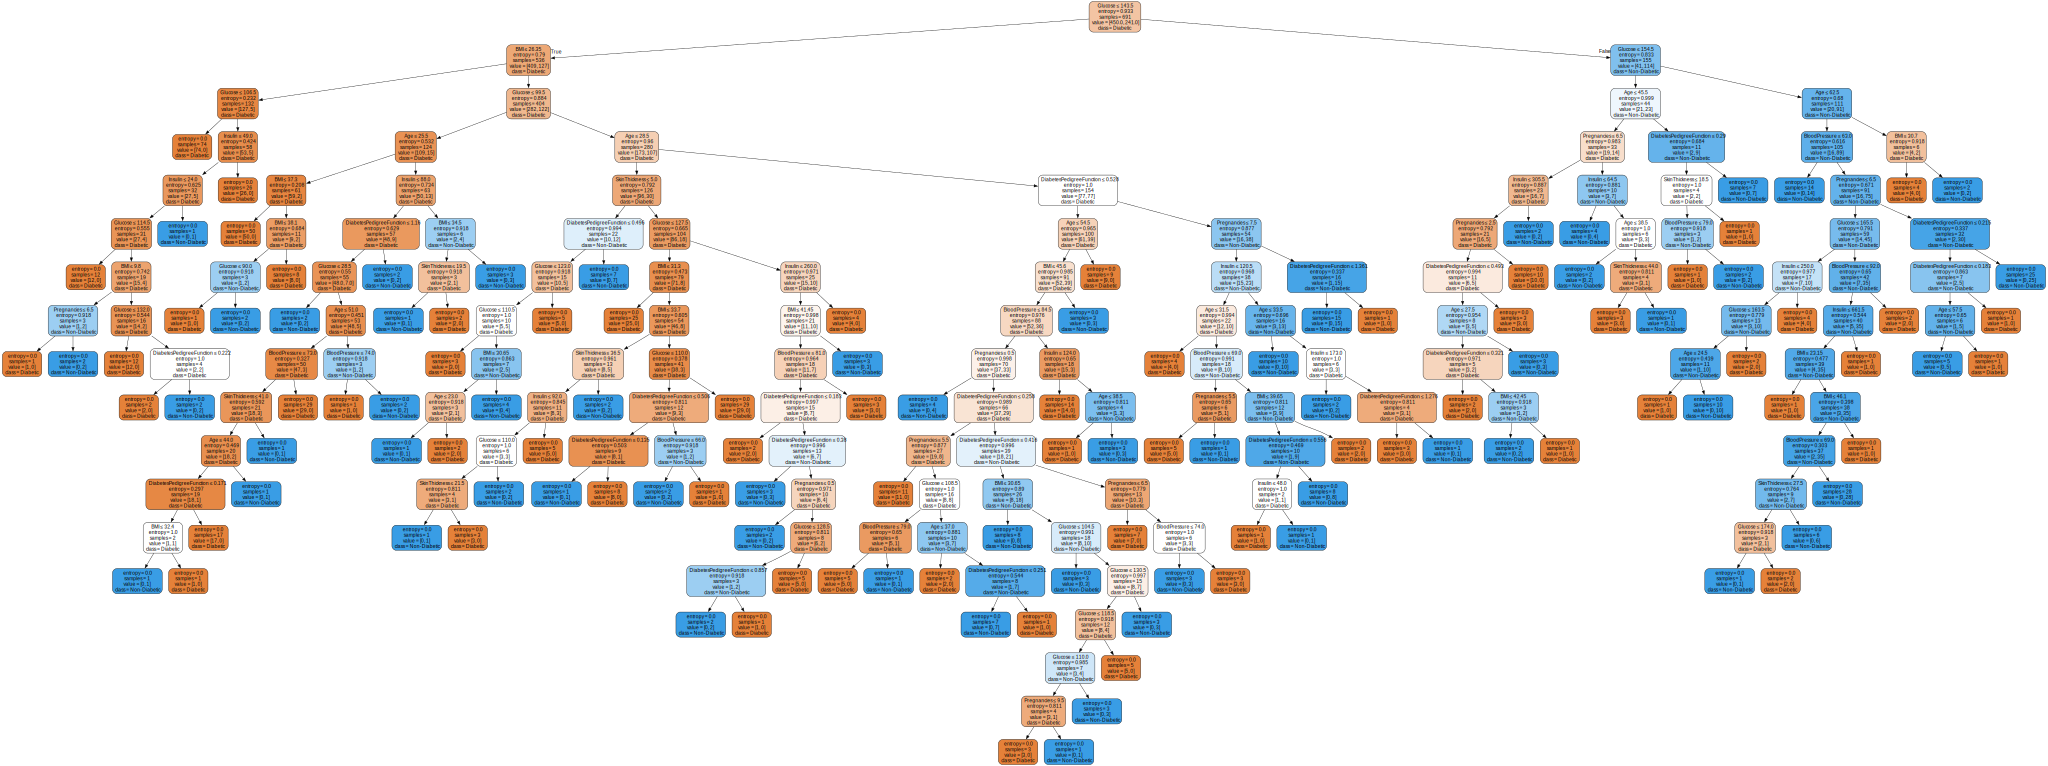

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

feature_names = diabetic_df.columns.drop('Outcome').tolist()   

for name, subset in splits.items():
    X_train, y_train = subset["X_train"], subset["y_train"]

    # fit
    clf = DecisionTreeClassifier(
        criterion="entropy",  
        random_state=42
    )
    clf.fit(X_train, y_train)

    dot_data = export_graphviz(
        clf,
        out_file=None,            
        feature_names=feature_names,
        class_names=labels,
        filled=True,             
        rounded=True,             
        special_characters=True
    )

    graph = graphviz.Source(dot_data)
    print(f"Decision Tree for {name} Split")
    display(graph) 

    # (Optional)save each tree as a PNG file, uncomment:
    # graph.render(filename=f"decision_tree_{name}", format="png", cleanup=True)


# CLASSIFICATION REPORT AND CONFUSION TREE


=== 40/60 Split ===
Classification Report:
              precision    recall  f1-score   support

    Diabetic     0.7703    0.7600    0.7651       300
Non-Diabetic     0.5636    0.5776    0.5706       161

    accuracy                         0.6963       461
   macro avg     0.6670    0.6688    0.6678       461
weighted avg     0.6981    0.6963    0.6972       461

Confusion Matrix:
[[228  72]
 [ 68  93]]


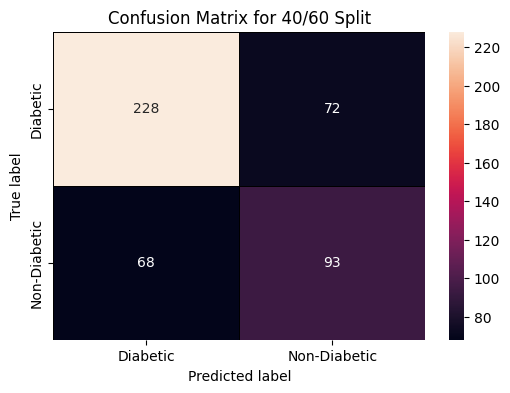


=== 60/40 Split ===
Classification Report:
              precision    recall  f1-score   support

    Diabetic     0.7833    0.7015    0.7402       201
Non-Diabetic     0.5312    0.6355    0.5787       107

    accuracy                         0.6786       308
   macro avg     0.6573    0.6685    0.6594       308
weighted avg     0.6958    0.6786    0.6841       308

Confusion Matrix:
[[141  60]
 [ 39  68]]


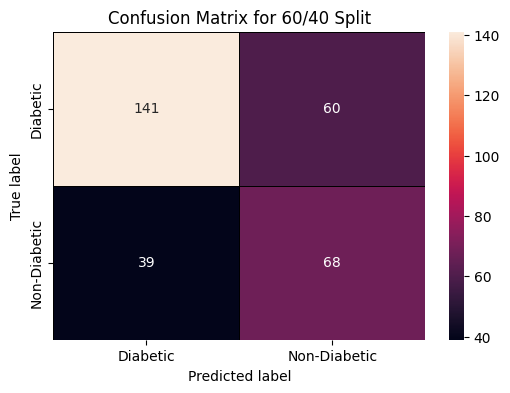


=== 80/20 Split ===
Classification Report:
              precision    recall  f1-score   support

    Diabetic     0.7547    0.8000    0.7767       100
Non-Diabetic     0.5833    0.5185    0.5490        54

    accuracy                         0.7013       154
   macro avg     0.6690    0.6593    0.6629       154
weighted avg     0.6946    0.7013    0.6969       154

Confusion Matrix:
[[80 20]
 [26 28]]


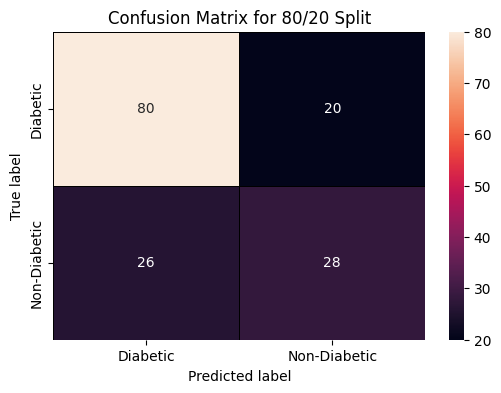


=== 90/10 Split ===
Classification Report:
              precision    recall  f1-score   support

    Diabetic     0.7308    0.7600    0.7451        50
Non-Diabetic     0.5200    0.4815    0.5000        27

    accuracy                         0.6623        77
   macro avg     0.6254    0.6207    0.6225        77
weighted avg     0.6569    0.6623    0.6592        77

Confusion Matrix:
[[38 12]
 [14 13]]


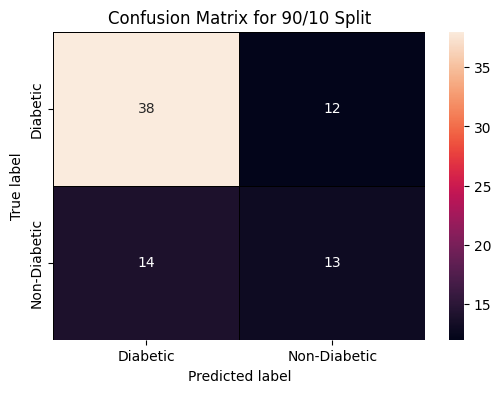

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


for name, subset in splits.items():
    X_train, y_train = subset["X_train"], subset["y_train"]
    X_test,  y_test  = subset["X_test"],  subset["y_test"]    

    clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print(f"\n=== {name} Split ===")
    print("Classification Report:")
    print(classification_report(
        y_test, y_pred,
        target_names=labels,
        digits=4
    ))
    
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='rocket', 
                xticklabels=labels, yticklabels=labels,
                linewidths=.5, linecolor='black') 
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix for {name} Split')
    plt.show()


# THE DEPTH AND ACCURACY OF A DECISION TREE


Decision Tree max depth = None


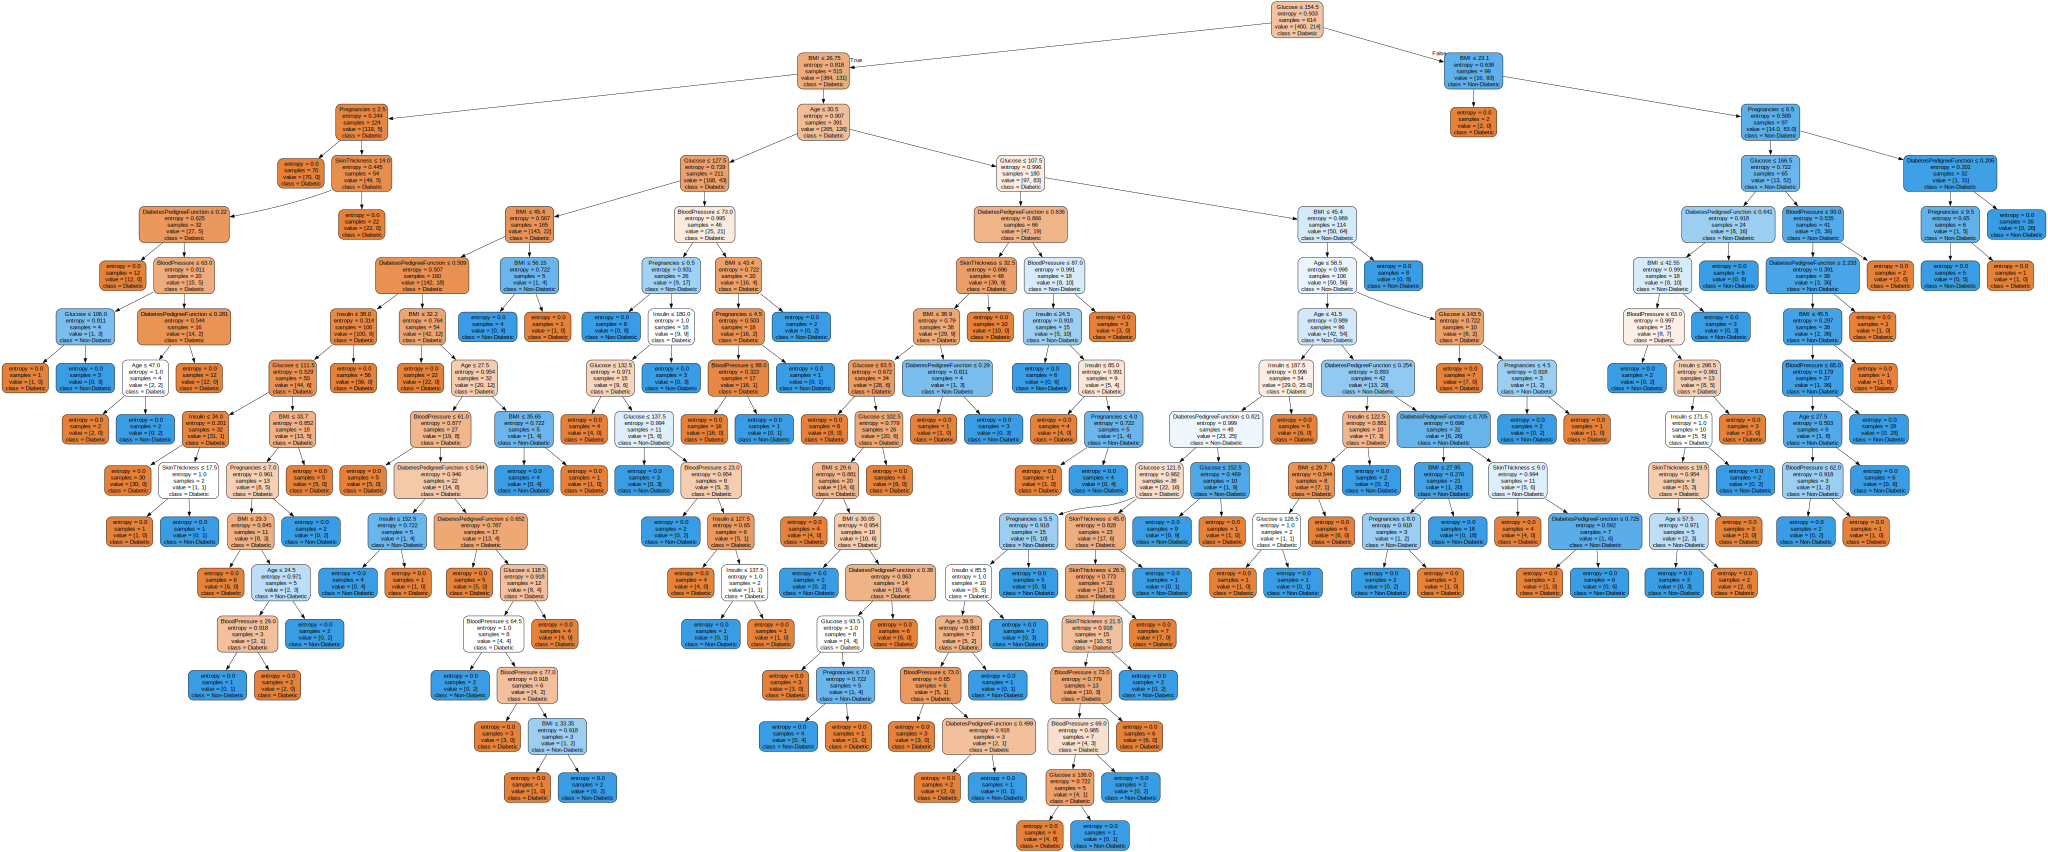


Decision Tree max depth = 2


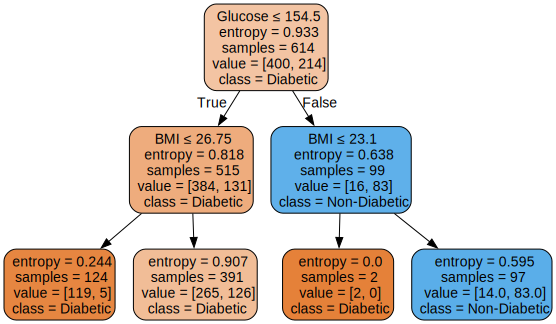


Decision Tree max depth = 3


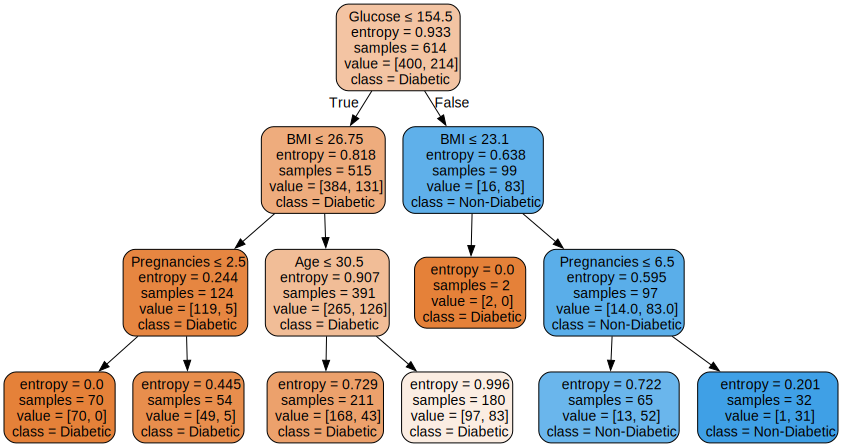


Decision Tree max depth = 4


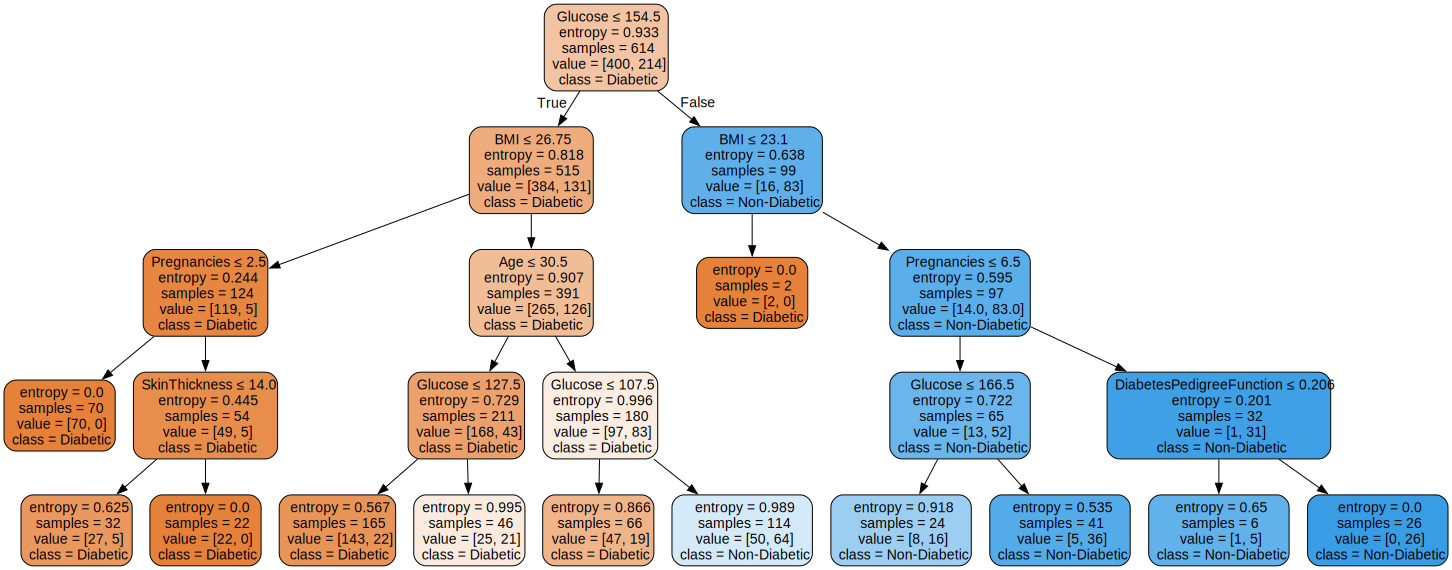


Decision Tree max depth = 5


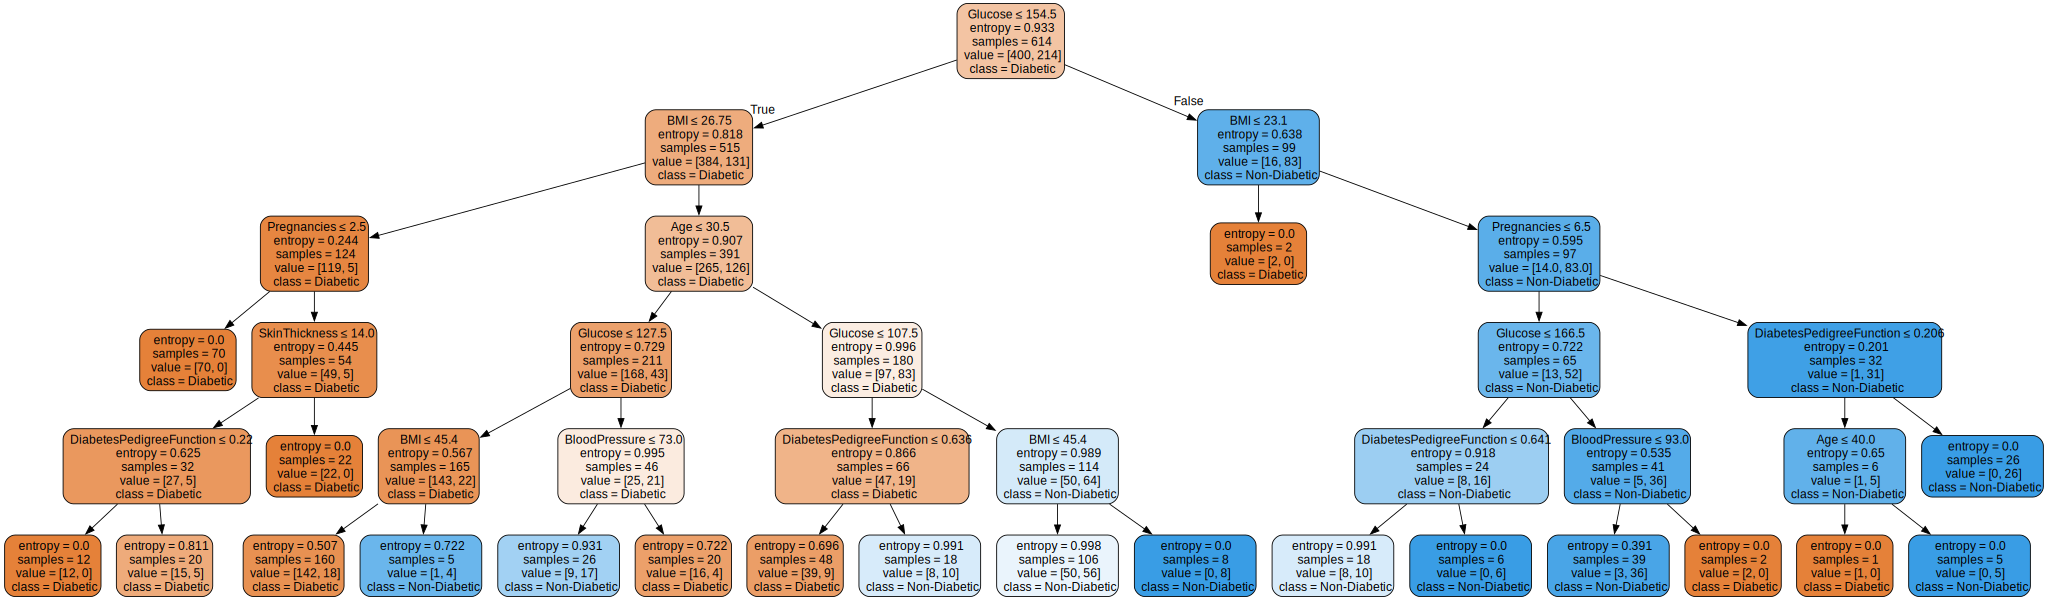


Decision Tree max depth = 6


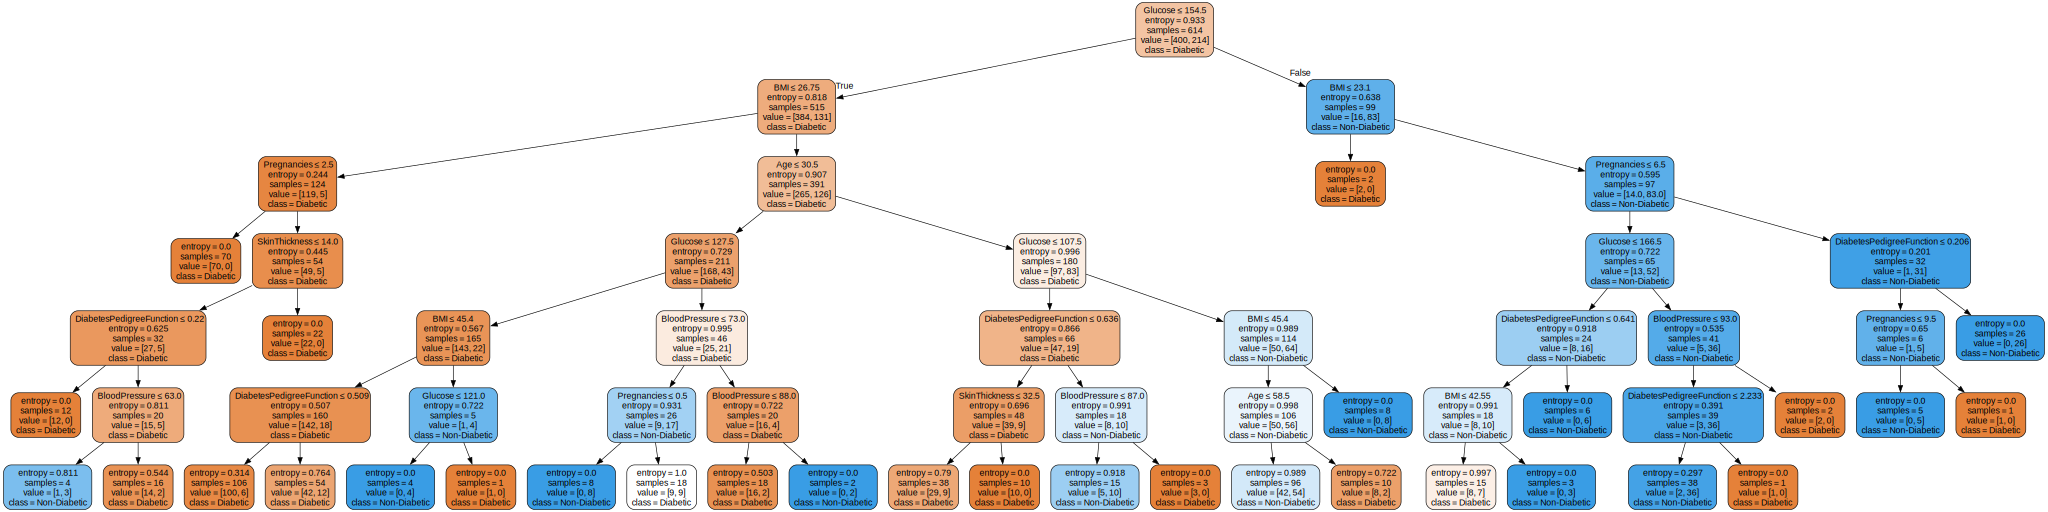


Decision Tree max depth = 7


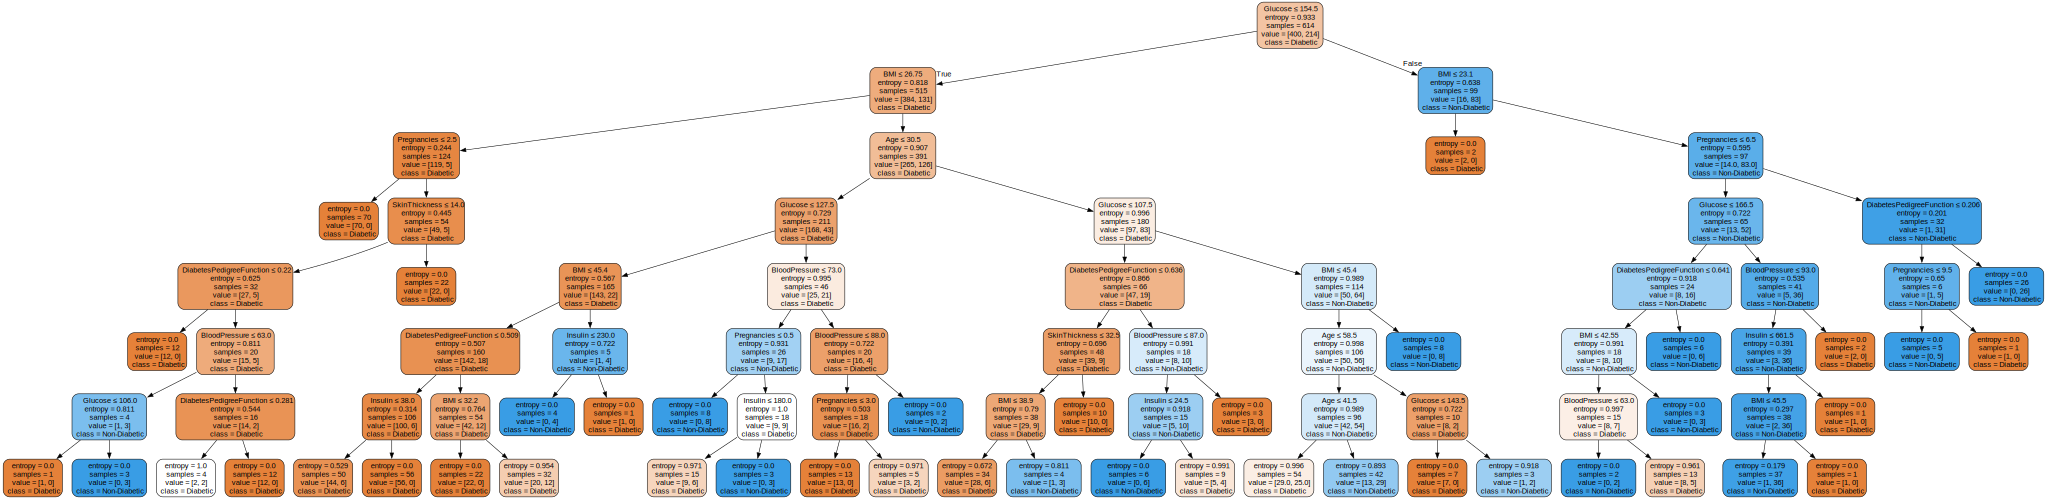


Accuracy by max_depth:
Max_depth	 Accuracy
None		 0.7013
2		 0.6948
3		 0.6948
4		 0.8052
5		 0.7922
6		 0.7662
7		 0.7078


In [48]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz
import pandas as pd
import matplotlib.pyplot as plt

# 1) Get the 80/20 split
subset = splits["80/20"]
X_train, y_train = subset["X_train"], subset["y_train"]
X_test,  y_test  = subset["X_test"],  subset["y_test"]

# 2) Try different max_depth values
max_depths = [None, 2, 3, 4, 5, 6, 7]
results = []

for depth in max_depths:
    # Train
    clf = DecisionTreeClassifier(
        criterion="entropy",
        max_depth=depth,
        random_state=42
    )
    clf.fit(X_train, y_train)
    
    # Predict & compute accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({
        "max_depth": "None" if depth is None else depth,
        "accuracy":  acc
    })
    
    # Export & display the tree
    dot = export_graphviz(
        clf,
        out_file=None,
        feature_names=feature_names,
        class_names=labels,
        filled=True,
        rounded=True,
        special_characters=True
    )
    print(f"\nDecision Tree max depth = {depth}")
    display(graphviz.Source(dot))

# Build a DataFrame of results
df_results = pd.DataFrame(results)

# Table
print("\nAccuracy by max_depth:")
print("Max_depth\t Accuracy")
for name, data in df_results.iterrows():
    print(f"{data['max_depth']}\t\t {data['accuracy']:.4f}")


# # Plot accuracy vs. max_depth
# plt.figure(figsize=(6,4))
# # Convert "None" label to a numeric placeholder for plotting
# x_vals = [depth if depth is not None else 0 for depth in max_depths]
# y_vals = df_results["accuracy"].values
# plt.plot(x_vals, y_vals, marker='o')
# plt.xticks([0,2,3,4,5,6,7], ["None",2,3,4,5,6,7])
# plt.xlabel("max_depth")
# plt.ylabel("Test Accuracy")
# plt.title("Effect of max_depth on Test Accuracy")
# plt.grid(True)
# plt.show()
